In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in list(coordinates):
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

avarua ck
busselton au
hermanus za
westlock ca
rikitea pf
mandalgovi mn
mullaitivu lk
yellowknife ca
bluff nz
mahebourg mu
guerrero negro mx
vila velha br
bongandanga cd
tolaga bay nz
ushuaia ar
rikitea pf
castro cl
puerto ayora ec
leh in
kapaa us
ushuaia ar
kieta pg
vaini to
hilo us
mount gambier au
ornes no
port blair in
uchaly ru
hofn is
pangnirtung ca
saint-philippe re
atuona pf
butaritari ki
hithadhoo mv
jamestown sh
mataura pf
busselton au
carnarvon au
norman wells ca
ushuaia ar
bethel us
tasiilaq gl
mataura pf
seredka ru
vaini to
atasu kz
kodiak us
clyde river ca
ushuaia ar
wittenheim fr
penzance gb
taolanaro mg
talnakh ru
ushuaia ar
albany au
rikitea pf
laguna br
cabo san lucas mx
conceicao do araguaia br
arraial do cabo br
puerto ayora ec
cabo san lucas mx
bredasdorp za
narsaq gl
kamenskoye ru
qaanaaq gl
mataura pf
cherskiy ru
tsihombe mg
east london za
ushuaia ar
yellowknife ca
eureka us
jamestown sh
boende cd
beira mz
porto velho br
norman wells ca
avera pf
vaini to
atuona p

sao filipe cv
bengkulu id
busselton au
qaanaaq gl
tiksi ru
ponta do sol cv
pisco pe
rabo de peixe pt
rikitea pf
kaitangata nz
mar del plata ar
bredasdorp za
illoqqortoormiut gl
leningradskiy ru
chapais ca
warwick au
severo-kurilsk ru
itamaraju br
vaini to
turukhansk ru
jamestown sh
talakan ru
atuona pf
albany au
punta arenas cl
muzhi ru
albany au
barrow us
taga dzong bt
la ronge ca
taolanaro mg
kapaa us
arraial do cabo br
lebu cl
arraial do cabo br
acari pe
espoo fi
taolanaro mg
havelock us
chimbote pe
rikitea pf
dauriya ru
inuvik ca
contramaestre cu
mikhaylovka kz
ushuaia ar
galle lk
rio gallegos ar
herat af
severo-kurilsk ru
mundo nuevo mx
ozark us
kapaa us
mataura pf
ushuaia ar
busselton au
senneterre ca
ahipara nz
brazzaville cg
busselton au
mataura pf
ushuaia ar
atuona pf
jamestown sh
new norfolk au
mataura pf
ojinaga mx
hilo us
kargasok ru
namibe ao
sitka us
ribeira grande pt
castro cl
hilo us
mahebourg mu
comodoro rivadavia ar
san policarpo ph
klaksvik fo
vila velha br
bluff nz


hermanus za
punta arenas cl
kapaa us
husavik is
port elizabeth za
atuona pf
ushuaia ar
severo-kurilsk ru
puerto ayora ec


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0d3d05c33c230bf1502027afc304656


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | westlock
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | mandalgovi
Processing Record 7 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | vila velha
Processing Record 13 of Set 1 | bongandanga
Processing Record 14 of Set 1 | tolaga bay
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | leh
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | kieta
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | hilo
Processing Record 23

Processing Record 38 of Set 4 | burnie
Processing Record 39 of Set 4 | constitucion
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | kimbe
Processing Record 42 of Set 4 | bonnyville
Processing Record 43 of Set 4 | abnub
Processing Record 44 of Set 4 | tabou
Processing Record 45 of Set 4 | nouna
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | turan
Processing Record 48 of Set 4 | fuente de oro
Processing Record 49 of Set 4 | tual
Processing Record 50 of Set 4 | baltasi
Processing Record 1 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 5 | yomou
Processing Record 3 of Set 5 | rodino
Processing Record 4 of Set 5 | bourges
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | denpasar
Processing Record 8 of Set 5 | san jeronimo
Processing Record 9 of Set 5 | ballina
Processing Record 10 of Set 5 | agadir
Processing Record 11 

Processing Record 28 of Set 8 | tabas
Processing Record 29 of Set 8 | patea
Processing Record 30 of Set 8 | humaita
Processing Record 31 of Set 8 | melbu
Processing Record 32 of Set 8 | karakol
Processing Record 33 of Set 8 | kamskoye ustye
Processing Record 34 of Set 8 | sajanan
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | dover
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | sibu
Processing Record 40 of Set 8 | leirvik
Processing Record 41 of Set 8 | asyut
Processing Record 42 of Set 8 | mwandiga
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | xinzhou
Processing Record 45 of Set 8 | ahuimanu
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | quatre cocos
Processing Record 48 of Set 8 | pisco
Processing Record 49 of Set 8 | rabo de peixe
Processing Record 50 of Set 8 | warwick
Processing Record 1 of Set 9 | severo-kurilsk
Processing Record 2 of Set 

Processing Record 21 of Set 12 | camacha
Processing Record 22 of Set 12 | gazipur
Processing Record 23 of Set 12 | inawashiro
Processing Record 24 of Set 12 | campo maior
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | alvorada
Processing Record 28 of Set 12 | barinas
Processing Record 29 of Set 12 | matipo
Processing Record 30 of Set 12 | artyk
City not found. Skipping...
Processing Record 31 of Set 12 | cabedelo
Processing Record 32 of Set 12 | taylorville
Processing Record 33 of Set 12 | smithers
Processing Record 34 of Set 12 | grand gaube
Processing Record 35 of Set 12 | bilma
Processing Record 36 of Set 12 | jinchang
Processing Record 37 of Set 12 | alice springs
Processing Record 38 of Set 12 | golubitskaya
Processing Record 39 of Set 12 | belle glade
Processing Record 40 of Set 12 | paamiut
Processing Record 41 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 12 | balingasay
Processing

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-03-12 00:27:12,-21.2078,-159.7750,84.20,65,90,3.44
1,Busselton,AU,2021-03-12 00:27:13,-33.6500,115.3333,63.00,84,100,3.00
2,Hermanus,ZA,2021-03-12 00:27:13,-34.4187,19.2345,66.00,81,97,5.99
3,Westlock,CA,2021-03-12 00:27:13,54.1502,-113.8688,23.00,80,57,5.75
4,Rikitea,PF,2021-03-12 00:27:14,-23.1203,-134.9692,79.54,78,68,11.65
5,Mandalgovi,MN,2021-03-12 00:27:14,45.7625,106.2708,27.79,85,0,7.16
6,Yellowknife,CA,2021-03-12 00:27:15,62.4560,-114.3525,14.00,62,75,17.27
7,Bluff,NZ,2021-03-12 00:27:16,-46.6000,168.3333,64.99,61,6,4.00
8,Mahebourg,MU,2021-03-12 00:27:16,-20.4081,57.7000,78.80,83,75,3.44
9,Guerrero Negro,MX,2021-03-12 00:22:48,27.9769,-114.0611,61.86,52,90,13.76


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

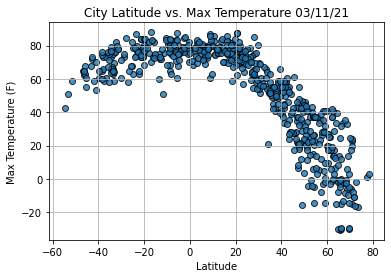

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(title)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

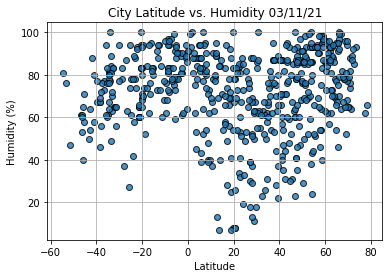

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(title)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

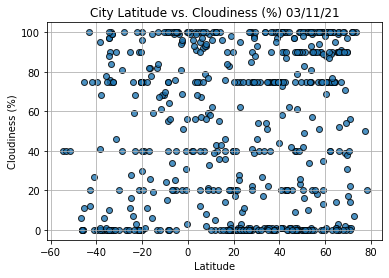

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(title)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

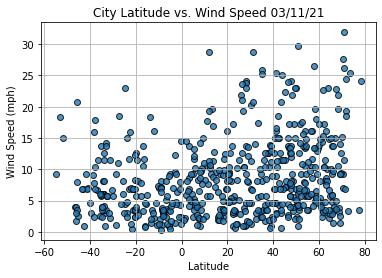

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(title)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

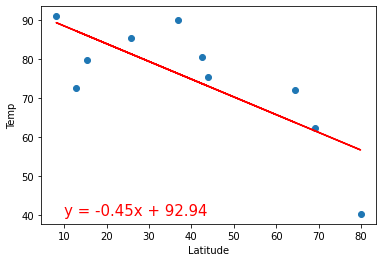

In [26]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-03-12 00:27:18
Lat                         -54.8
Lng                         -68.3
Max Temp                     42.8
Humidity                       81
Cloudiness                     40
Wind Speed                   9.22
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
572     True
573    False
574     True
575    False
576     True
Name: Lat, Length: 577, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Westlock,CA,2021-03-12 00:27:13,54.1502,-113.8688,23.00,80,57,5.75
5,Mandalgovi,MN,2021-03-12 00:27:14,45.7625,106.2708,27.79,85,0,7.16
6,Yellowknife,CA,2021-03-12 00:27:15,62.4560,-114.3525,14.00,62,75,17.27
9,Guerrero Negro,MX,2021-03-12 00:22:48,27.9769,-114.0611,61.86,52,90,13.76
11,Bongandanga,CD,2021-03-12 00:27:17,1.5000,21.0500,68.52,93,100,2.17


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

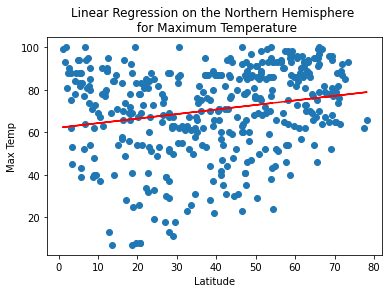

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(40,0))

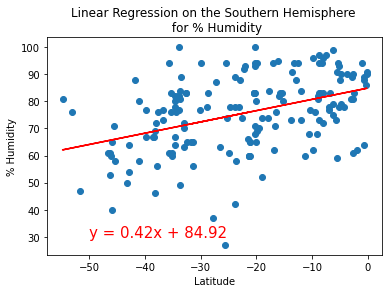

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50, 30))

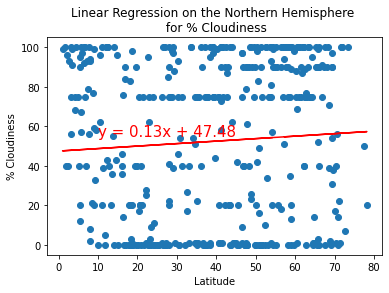

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

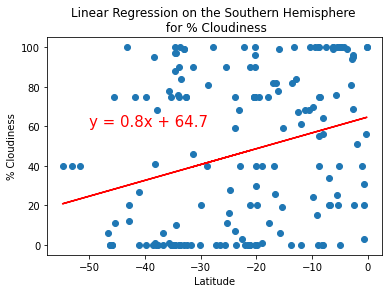

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

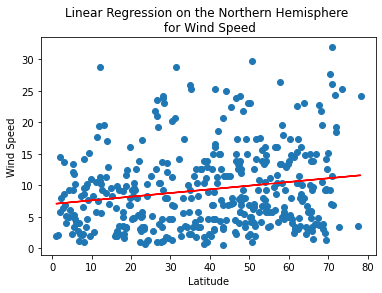

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

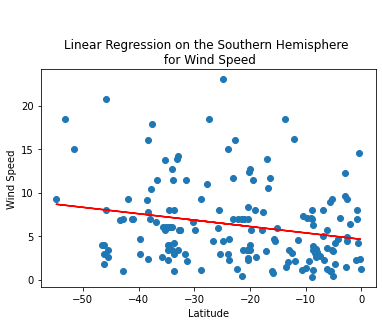

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))